In [1]:
# import labraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from astropy import units as u
from astropy.constants import m_e, c, hbar, M_sun, G, m_n

from scipy.integrate import solve_ivp
from scipy.integrate import odeint

plt.rcParams.update({
    "text.usetex": True,                
    "font.family": "serif",
    "font.serif": ["Computer Modern"],
    "figure.dpi": 200,                   
    "grid.alpha": 0.4,                    
})


Following Neutron Stars for undergraduates, solved the TOV equations for different Equations of state


# TOV Equations

$$
\begin{aligned}
\frac{dp}{dr}&= -\frac{G \epsilon(r)M(r)}{c^2r^2}\bigg(1+ \frac{p(r)}{e(r)}\bigg)\bigg(1+ \frac{4\pi r^3p(r)}{M(r)c^2}\bigg)\bigg(1-\frac{2GM(r)}{c^2r}\bigg)^{-1}\\

\frac{dM}{dr}&= \frac{4 \pi r^2 \epsilon (r)}{c^2}

\end{aligned}
$$


# Electron-degenerated matter (White Dwarf)


Equation of state:

$$
p(\epsilon) = K \epsilon^\gamma
$$
Approximate solutions for two different regimes: (NonRel.  $k_F\ll m_e$, Rel. $k_F\gg m_e$.):
$$
K_\text{NR} = \frac{\hbar^2}{15\pi^2m_e}\bigg(\frac{3 \pi^2 Z}{Am_Nc^2}\bigg)^{5/3} \qquad K_\text{R} = \frac{\hbar \ c}{15\pi^2}\bigg(\frac{3 \pi^2 Z}{Am_Nc^2}\bigg)^{4/3} 
$$
$$
\gamma_\text{NR} = \frac{5}{3} \qquad \gamma_\text{R} = \frac{4}{3} 
$$



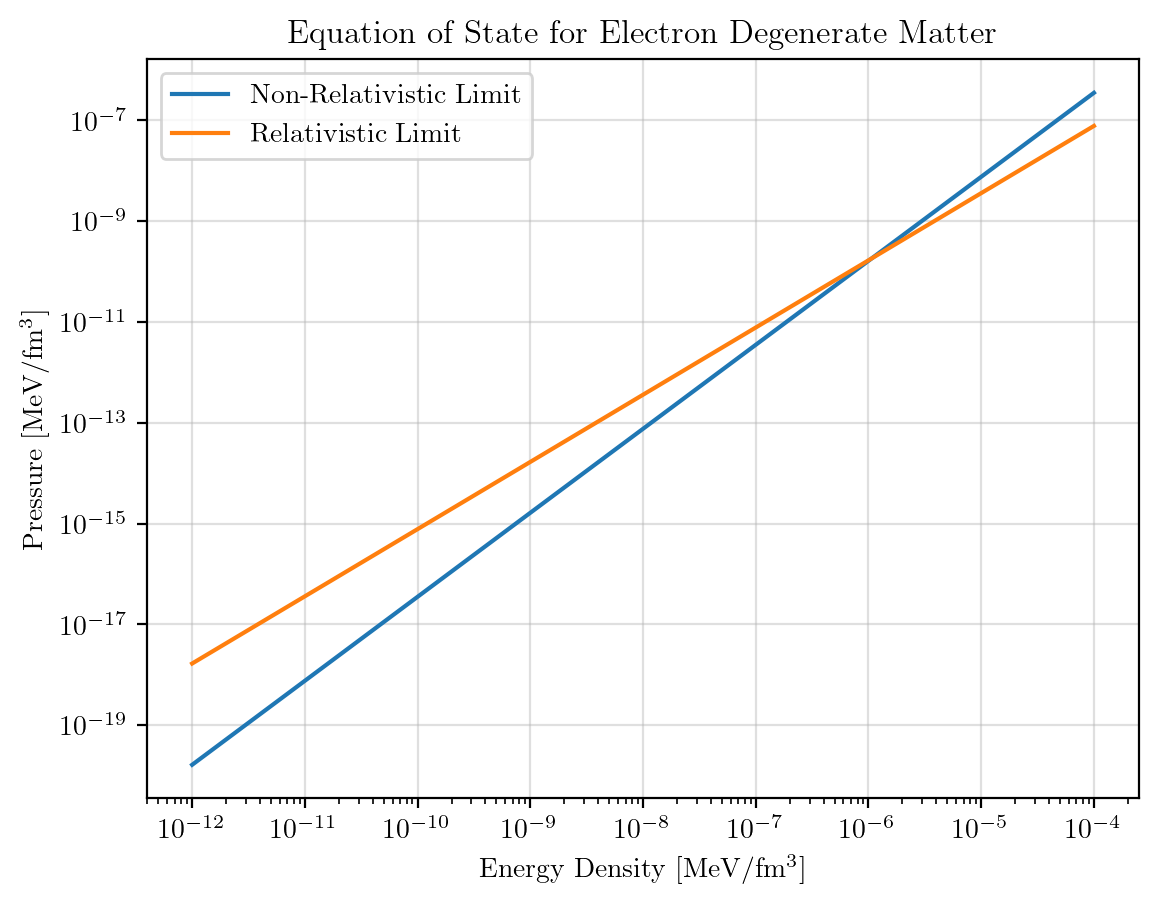

In [2]:
AZ = 1 # A/Z 
K_R  = (hbar * c / 12 / np.pi**2 * ((3 * np.pi**2)/ (931.5 * u.MeV * AZ)) **(4/3)).to('fm / MeV**(1/3)')
K_NR = (hbar ** 2 / 15 / np.pi**2 / m_e * ((3 * np.pi**2)/ (931.5 * u.MeV * AZ)) **(5/3)).to('fm2 / MeV**(2/3)')

def p_R_EOS_electron_matter(e):
    return K_R  * e ** (4/3)

def p_NR_EOS_electron_matter(e):
    return K_NR * e ** (5/3)

e_vals = np.logspace(-12, -4, 1000) * u.MeV / u.fm**3
p_NR_vals = p_NR_EOS_electron_matter(e_vals)
p_R_vals  = p_R_EOS_electron_matter(e_vals)

plt.loglog(e_vals,p_NR_vals, label='Non-Relativistic Limit')
plt.loglog(e_vals, p_R_vals, label='Relativistic Limit')
plt.xlabel('Energy Density [MeV/fm$^3$]')
plt.ylabel('Pressure [MeV/fm$^3$]')
plt.title('Equation of State for Electron Degenerate Matter')
plt.grid()
plt.legend()
plt.show()



We must solve the TOV using dimensionless $\bar p, \bar M$, defined as
$$
\begin{aligned}
p &= \epsilon_0 \bar p\\
\epsilon &= \epsilon_0 \bar \epsilon\\
M &= M_0 \bar M\\
K &= \epsilon_0^{1-\gamma} \bar K\\
\end{aligned}
$$
EoS:
$$
\bar p = \bar K \bar \epsilon^\gamma
$$

The TOV becomes

$$
\begin{aligned}
\frac{d\bar p}{dr}&= -\frac{G M_0}{c^2}\left(\frac{\bar p}{\bar K}\right) ^{1/\gamma}\frac{\bar M }{r^2}
\bigg(1+ \bar p^{1-1/\gamma} \bar K^{1/\gamma}\bigg)
\bigg(1+ \frac{4\pi \epsilon_0\bar p}{M_0 \bar M c^2} r^3 \bigg)
\bigg(1-\frac{2G M_0 \bar M}{c^2r}\bigg)^{-1}\\

\frac{d \bar M}{dr}&= \frac{4 \pi\epsilon_0 r^2}{M_0c^2} \left(\frac{\bar p}{\bar K}\right) ^{1/\gamma}  

\end{aligned}
$$


In [3]:
#---- Saturation density and energy density ----

n_0 = 0.16 * u.fm**-3 # saturation density
m_0 = 939 * u.MeV / c**2  # neutron mass
e_0 = n_0 * m_0 * c**2 # saturation energy density


K_R  = (hbar * c / 12 / np.pi**2 * ((3 * np.pi**2)/ (931.5 * u.MeV * AZ)) **(4/3)).to('fm / MeV**(1/3)')
gamma_R = 4/3
K_0_R = e_0**(1-gamma_R)
K_R = K_R/K_0_R

print(f"K_R = {K_R:.3e}")

def p_R_EOS_electron_matter(e):
    return K_R  * e ** (4/3)


K_NR = (hbar ** 2 / 15 / np.pi**2 / m_e * ((3 * np.pi**2)/ (931.5 * u.MeV * AZ)) **(5/3)).to('fm2 / MeV**(2/3)')
gamma_NR = 5/3
K_0_NR = e_0**(1-gamma_NR)
K_NR = K_NR/K_0_NR

def p_NR_EOS_electron_matter(e):
    return K_NR * e ** (5/3)
print(f"K_NR = {K_NR:.3e}")

K_R = 8.918e-02
K_NR = 4.640e+01


In [4]:
#To recover their results, use the same central pressure as in the paper, i.e. 10^-16
pc= 1e-16 * 7.463 * 10**39 * u.erg/u.cm**3  
print(f"Central pressure: {pc.to('MeV/fm3'):.3e}")
central_pressure = (pc / e_0).decompose().value  # adimensional
print(f"Central pressure (adim): {central_pressure:.3e}")

central_energy = (central_pressure / K_R)**(1/gamma_R)
print(f"Central energy density: {central_energy * e_0:.3e}")
print(f"Central energy density: {central_energy:.3e} (adim)")

Central pressure: 4.658e-10 MeV / fm3
Central pressure (adim): 3.100e-12
Central energy density: 2.151e-06 MeV / fm3
Central energy density: 1.432e-08 (adim)


Surface radius: 33667.6
Pressure at surface: -1.9123403473617855e-24 MeV / fm3
Mass at surface: 5.815228976747179


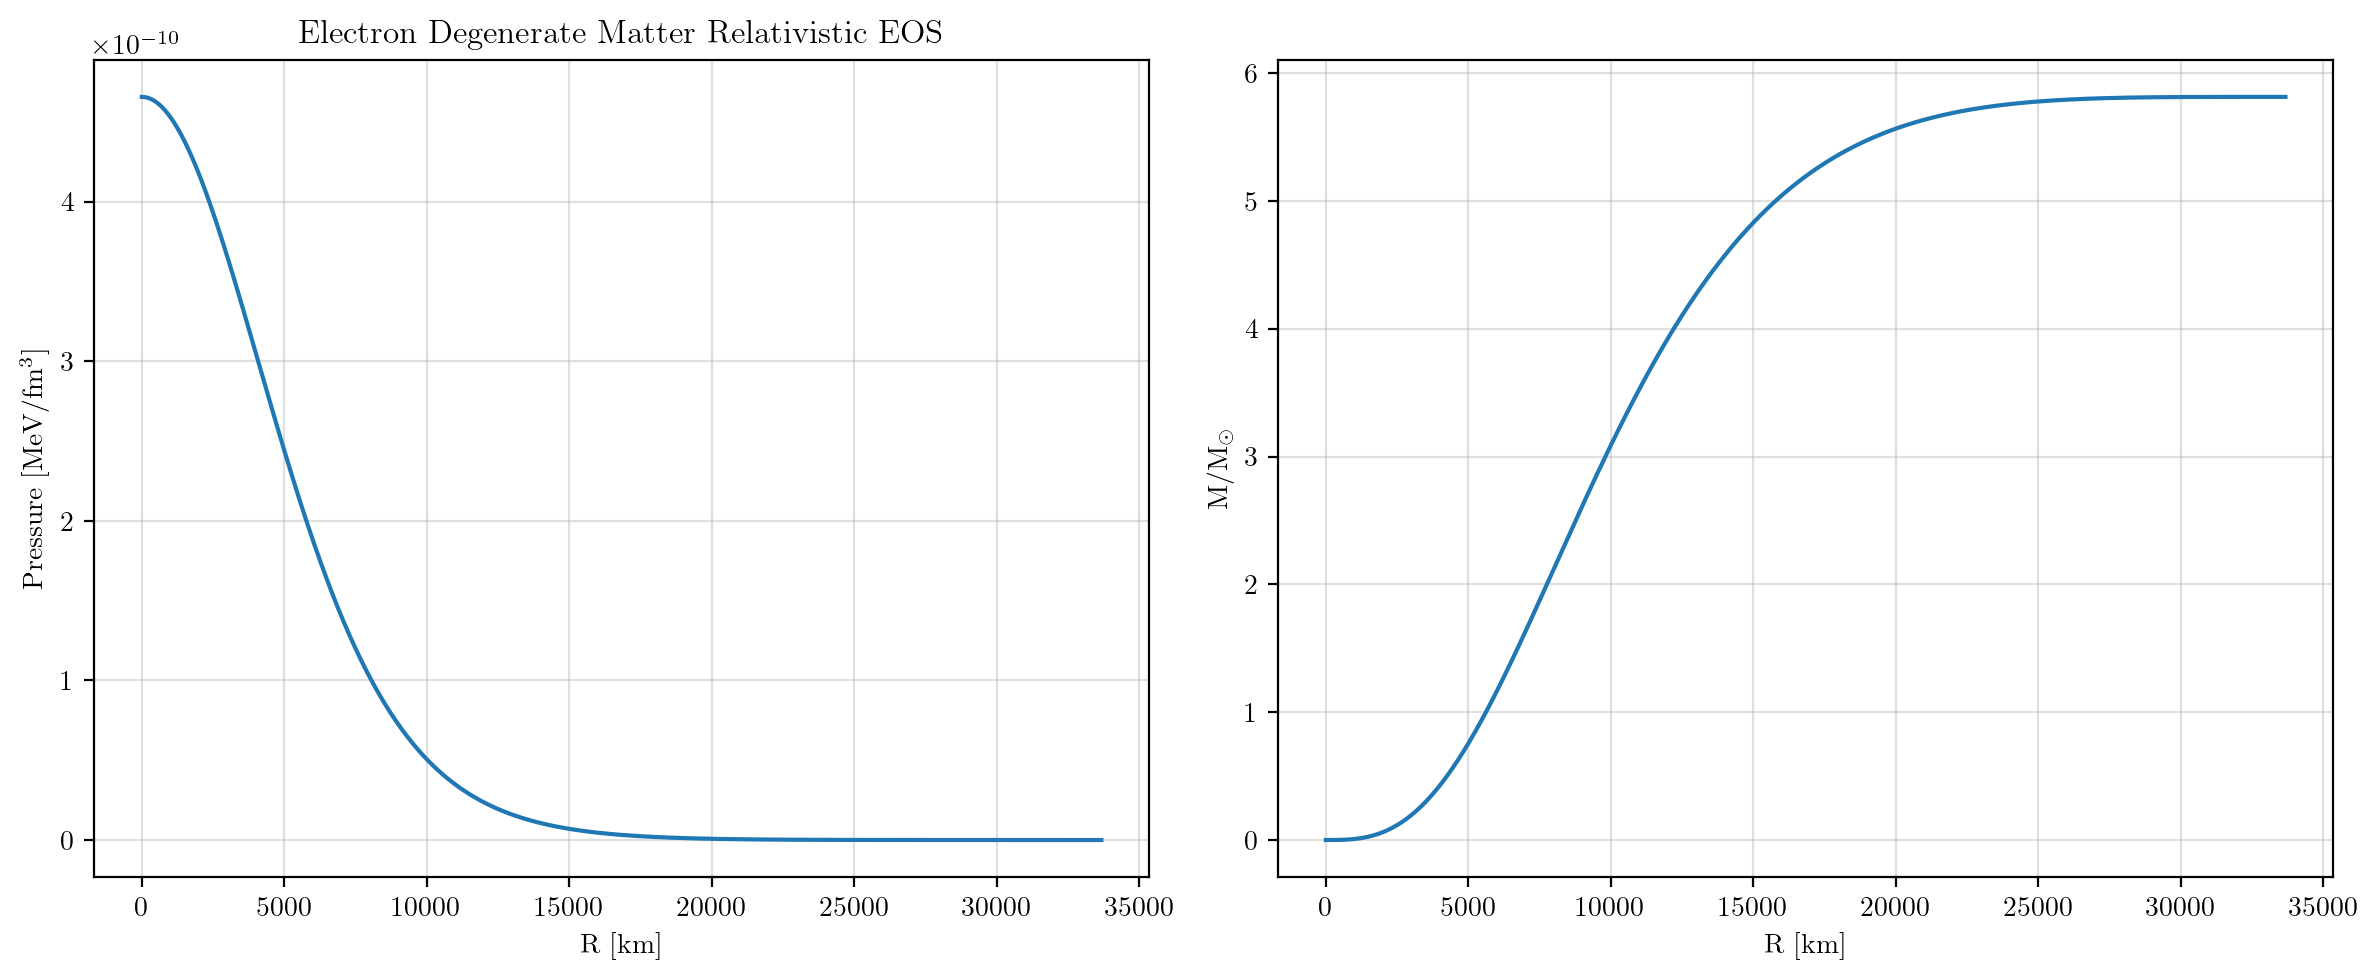

In [5]:
# ----------------------------------------------------
# TOV equations
# ----------------------------------------------------
R_0 = (G * M_sun / c**2).to(u.km)  # in km

alpha = (4 * np.pi * e_0 / c**2 / M_sun).to(1/u.km**3).value

def R_TOV_electron_matter(x,r):
    p, M = x
    if p < 0:
        # avoid negative pressure during integration
        return [0, 0]

    term1 = R_0.value * (p/K_R)**(1/gamma_R) * M / r**2
    term2 = 1 + p**(1-1/gamma_R) * K_R**(1/gamma_R)
    if M == 0:
        term3 = 1.0
    else:
        term3 = 1.0 + alpha * r**3 * p / M
    term4 = 1 - 2 * R_0.value * M / r

    if term4 <= 0:
        return [0, 0]

    dpdr = - term1 * term2 * term3 / term4
    dMdr = alpha * r**2 * (p/K_R)**(1/gamma_R)

    return [dpdr, dMdr]



# ----------------------------------------------------
# Initial conditions
# ----------------------------------------------------

central_pressure =  p_R_EOS_electron_matter(central_energy)

r0 = 0.1             
central_mass_density = (central_energy * e_0 / c**2 /M_sun).to(1/ u.km**3)
central_mass = (4/3) * np.pi * r0**3 * central_mass_density.value


x0 = [central_pressure, central_mass]   # p(r0), M(r0)
deltar = 0.1
radius = np.arange(r0, 2000000, deltar)  # integra llarg

sol = odeint(R_TOV_electron_matter, x0, radius)

pressure = sol[:,0]
mass = sol[:,1]

R_surface = radius[np.where(pressure <= 0)[0][0]]  # first index where pressure <= 0
P_surface = pressure[np.where(pressure <= 0)[0][0]]  #stores the state vector at the event
M_surface = mass[np.where(pressure <= 0)[0][0]]  #stores the state vector at the event
print("Surface radius:", R_surface)
print("Pressure at surface:", P_surface*e_0)   # Should be exactly 0
print("Mass at surface:", M_surface)

# ----------------------------------------------------
# Plot results
# ----------------------------------------------------
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(radius[np.where(pressure > 0)], pressure[np.where(pressure > 0)]*e_0)
plt.xlabel("R [km]")
plt.ylabel("Pressure [MeV/fm$^3$]")
plt.title("Electron Degenerate Matter Relativistic EOS")
plt.grid()

plt.subplot(1,2,2)
plt.plot(radius[np.where(pressure > 0)], mass[np.where(pressure > 0)])
plt.xlabel("R [km]")
plt.ylabel("M/M$_\odot$")
plt.grid()

plt.tight_layout()
plt.show()



Maximum mass of a white dwarf is 1.4M0, and radius should be Earth-like $\sim 7000$ km. So it's clearly wrong

Central pressure: 2.488e+21 erg / cm3
Central pressure: 1.553e-12 MeV / fm3
Central pressure (adim): 1.034e-14
Central energy density: 6.099e-06 MeV / fm3
Central energy density: 4.060e-08 (adim)
Surface radius: 20306.2
Pressure at surface: -2.207212303511802e-23
Mass at surface: 5.808956285334926


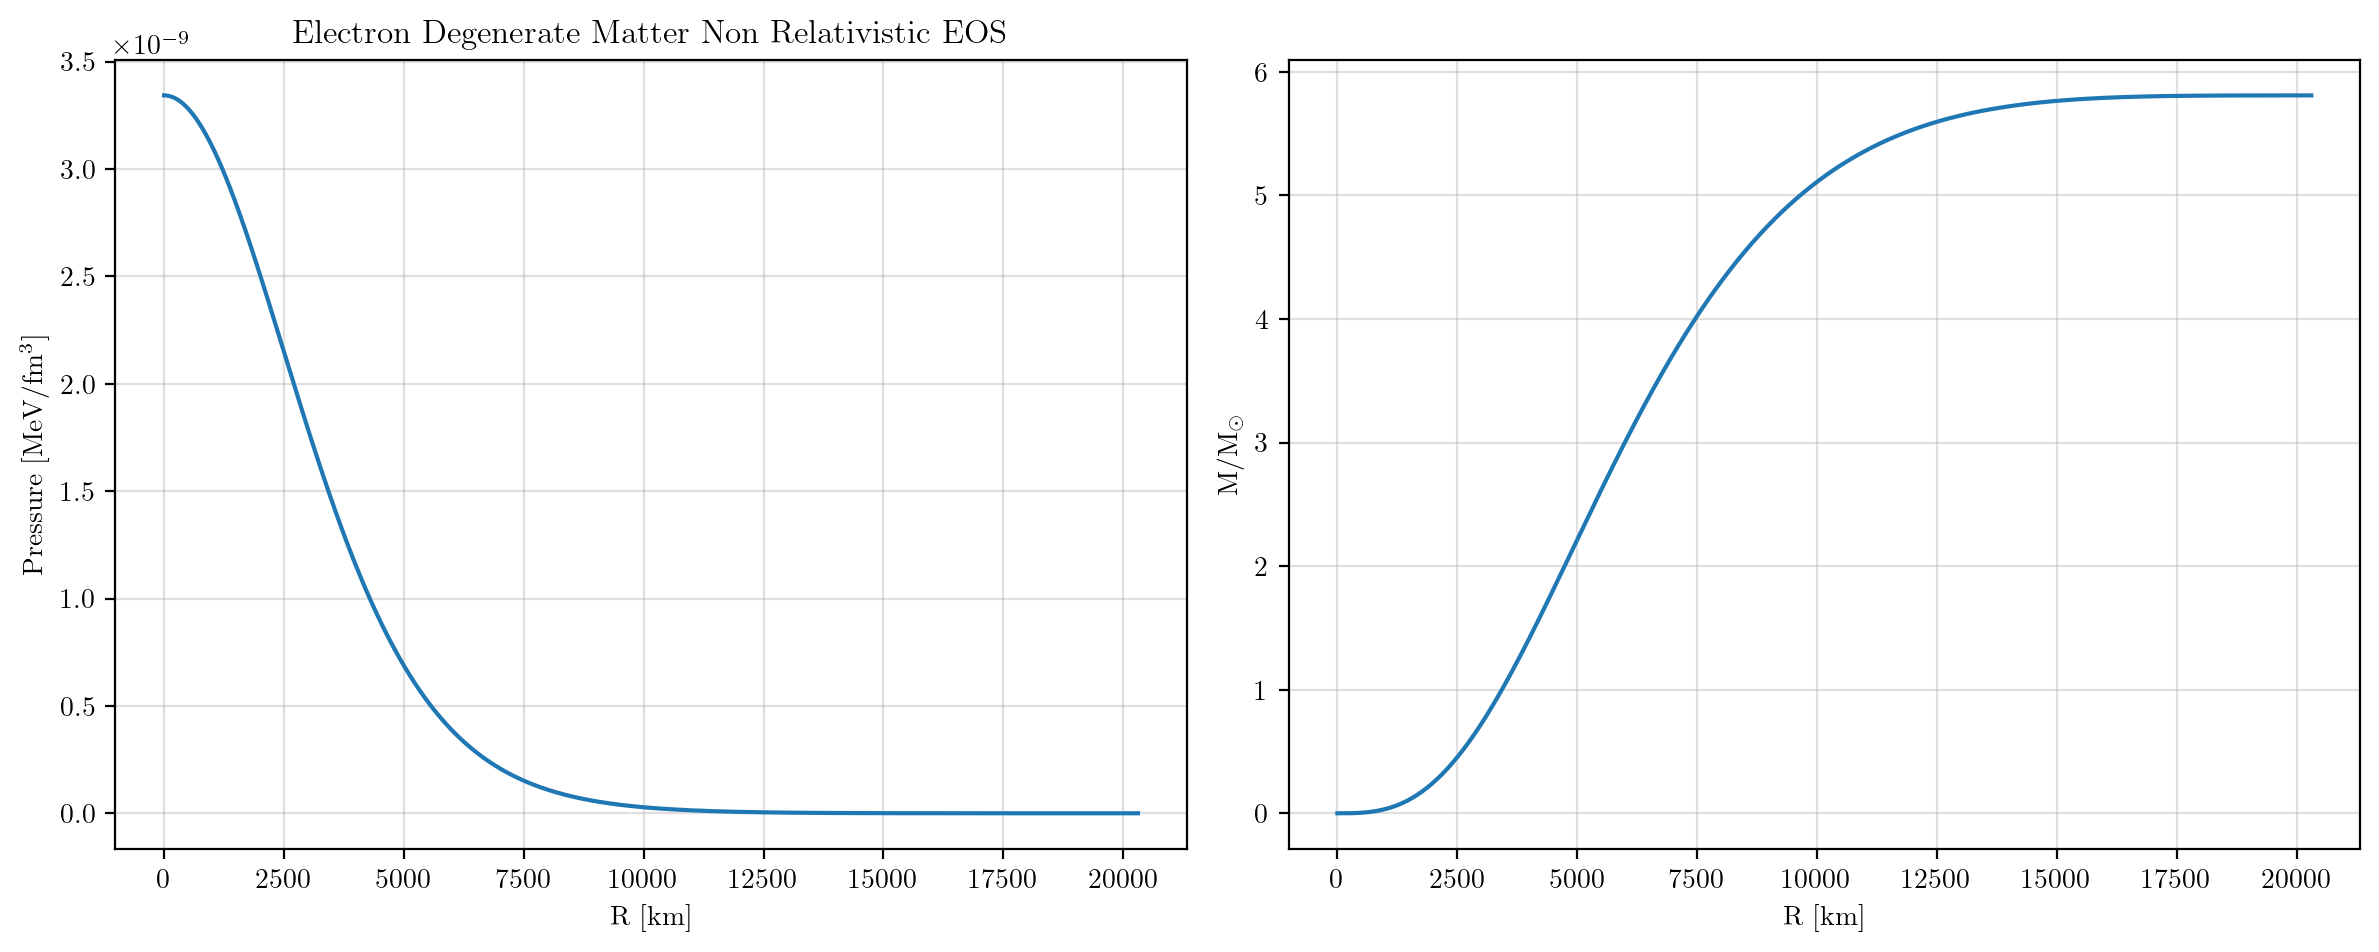

In [6]:
# ----------------------------------------------------
# TOV equations
# ----------------------------------------------------

def NR_TOV_electron_matter(x,r):
    p, M = x
    if p < 0:
        # avoid negative pressure during integration
        return [0, 0]

    term1 = R_0.value * (p/K_NR)**(1/gamma_NR) * M / r**2
    term2 = 1 + p**(1-1/gamma_NR) * K_R**(1/gamma_NR)
    if M == 0:
        term3 = 1.0
    else:
        term3 = 1.0 + alpha * r**3 * p / M
    term4 = 1 - 2 * R_0.value * M / r

    if term4 <= 0:
        return [0, 0]

    dpdr = - term1 * term2 * term3 / term4
    dMdr = alpha * r**2 * (p/K_NR)**(1/gamma_NR)

    return [dpdr, dMdr]


# ----------------------------------------------------
# Initial conditions
# ----------------------------------------------------

pc= 1e-16 * 2.488* 10**37 * u.erg/u.cm**3  # central pressure
print(f"Central pressure: {pc:.3e}")
print(f"Central pressure: {pc.to('MeV/fm3'):.3e}")
central_pressure = (pc / e_0).decompose().value  # adimensional
print(f"Central pressure (adim): {central_pressure:.3e}")

central_energy = (central_pressure * K_NR)**(1/gamma_NR)
print(f"Central energy density: {central_energy * e_0:.3e}")
print(f"Central energy density: {central_energy:.3e} (adim)")

central_pressure =  p_NR_EOS_electron_matter(central_energy)

r0 = 0.1             
central_mass_density = (central_energy * e_0 / c**2 /M_sun).to(1/ u.km**3)
central_mass = (4/3) * np.pi * r0**3 * central_mass_density.value
x0 = [central_pressure, central_mass]   # p(r0), M(r0)
deltar = 0.1
radius = np.arange(r0, 2000000, deltar)  # integra llarg

sol = odeint(R_TOV_electron_matter, x0, radius)

pressure = sol[:,0]
mass = sol[:,1]

R_surface = radius[np.where(pressure <= 0)[0][0]]  # first index where pressure <= 0
P_surface = pressure[np.where(pressure <= 0)[0][0]]  #stores the state vector at the event
M_surface = mass[np.where(pressure <= 0)[0][0]]  #stores the state vector at the event
print("Surface radius:", R_surface)
print("Pressure at surface:", P_surface)   # Should be exactly 0
print("Mass at surface:", M_surface)

# ----------------------------------------------------
# Plot results
# ----------------------------------------------------
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(radius[np.where(pressure > 0)], pressure[np.where(pressure > 0)]*e_0)
plt.xlabel("R [km]")
plt.ylabel("Pressure [MeV/fm$^3$]")
plt.title("Electron Degenerate Matter Non Relativistic EOS")
plt.grid()

plt.subplot(1,2,2)
plt.plot(radius[np.where(pressure > 0)], mass[np.where(pressure > 0)])
plt.xlabel("R [km]")
plt.ylabel("M/M$_\odot$")
plt.grid()

plt.tight_layout()
plt.show()

# Pure netron star


Following the same preocedure, they also derive two polytrope EOS valid in the relativistic and non relativistic regime:

Equation of state:

$$
p(\epsilon) = K \epsilon^\gamma
$$
Now with
$$
K_\text{NR} = \frac{\hbar^2}{15\pi^2m_n}\bigg(\frac{3 \pi^2 Z}{Am_nc^2}\bigg)^{5/3} \qquad K_\text{R} = \frac{1}{3}
$$
$$
\gamma_\text{NR} = \frac{5}{3} \qquad \gamma_\text{R} = 1 
$$


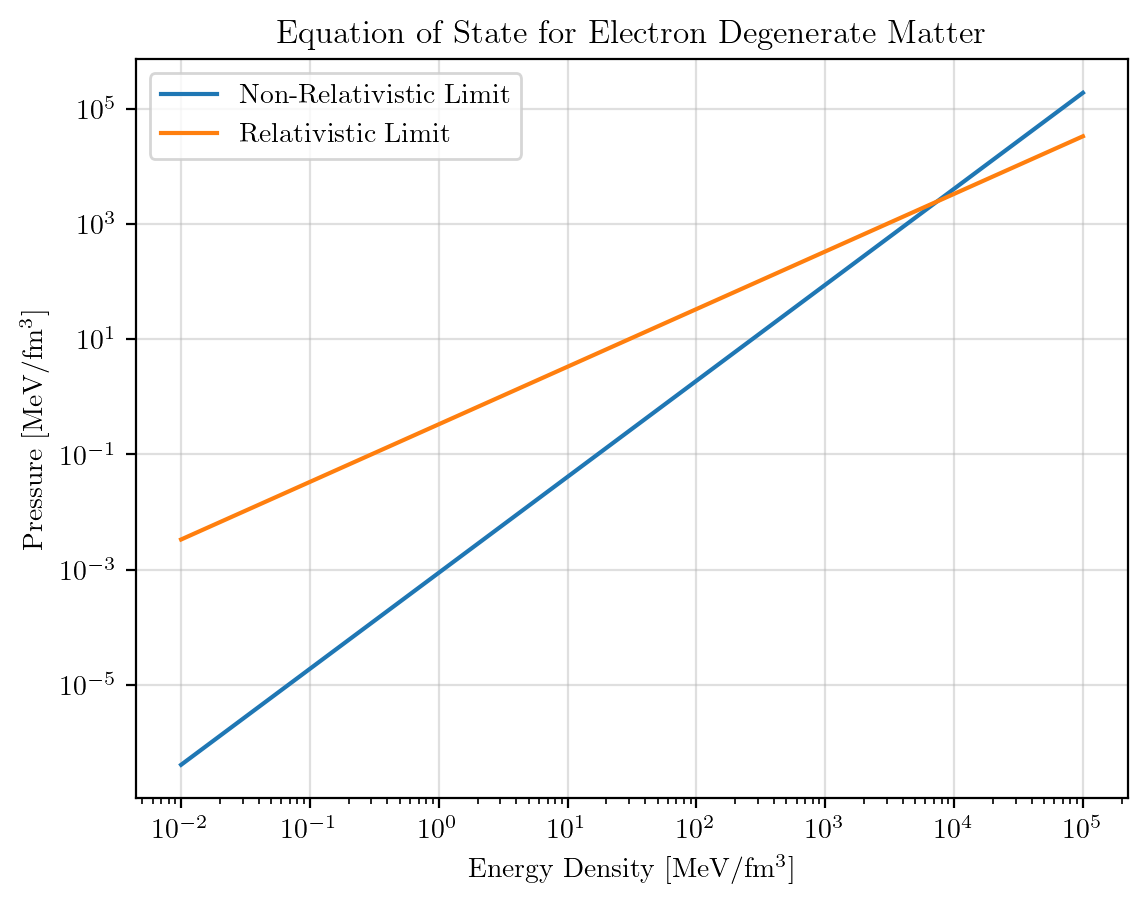

In [7]:
K_R  = 1/3
K_NR = (hbar ** 2 / 15 / np.pi**2 / m_n * ((3 * np.pi**2)/ (c**2 * m_n * AZ)) **(5/3)).to('fm2 / MeV**(2/3)')

def p_R_EOS_electron_matter(e):
    return K_R  * e

def p_NR_EOS_electron_matter(e):
    return K_NR * e ** (5/3)

e_vals = np.logspace(-2, 5, 1000) * u.MeV / u.fm**3
p_NR_vals = p_NR_EOS_electron_matter(e_vals)
p_R_vals  = p_R_EOS_electron_matter(e_vals)

plt.loglog(e_vals,p_NR_vals, label='Non-Relativistic Limit')
plt.loglog(e_vals, p_R_vals, label='Relativistic Limit')
plt.xlabel('Energy Density [MeV/fm$^3$]')
plt.ylabel('Pressure [MeV/fm$^3$]')
plt.title('Equation of State for Electron Degenerate Matter')
plt.grid()
plt.legend()
plt.show()


In [8]:
#---- Saturation density and energy density ----

n_0 = 0.16 * u.fm**-3 # saturation density
m_0 = 939 * u.MeV / c**2  # neutron mass
e_0 = n_0 * m_0 * c**2 # saturation energy density

gamma_R = 1
K_R = 1/3
print(f"K_R = {K_R:.3e}")

def p_R_EOS_neutron_matter(e):
    return K_R  * e


gamma_NR = 5/3
K_0_NR = e_0**(1-gamma_NR)
K_NR = K_NR/K_0_NR
def p_NR_EOS_neutron_matter(e):
    return K_NR * e ** (5/3)
print(f"K_NR = {K_NR:.3e}")

K_R = 3.333e-01
K_NR = 2.487e-02


In [9]:
pc= 0.01 * 5.346 * 10**36 * u.erg/u.cm**3  # central pressure

print(f"Central pressure: {pc.to('MeV/fm3'):.3e}")
central_pressure = (pc / e_0).decompose().value  # adimensional
print(f"Central pressure (adim): {central_pressure:.3e}")

central_energy = (central_pressure * K_R)**(1/gamma_R)
print(f"Central energy density: {central_energy * e_0:.3e}")
print(f"Central energy density: {central_energy:.3e} (adim)")

Central pressure: 3.337e+01 MeV / fm3
Central pressure (adim): 2.221e-01
Central energy density: 1.112e+01 MeV / fm3
Central energy density: 7.403e-02 (adim)


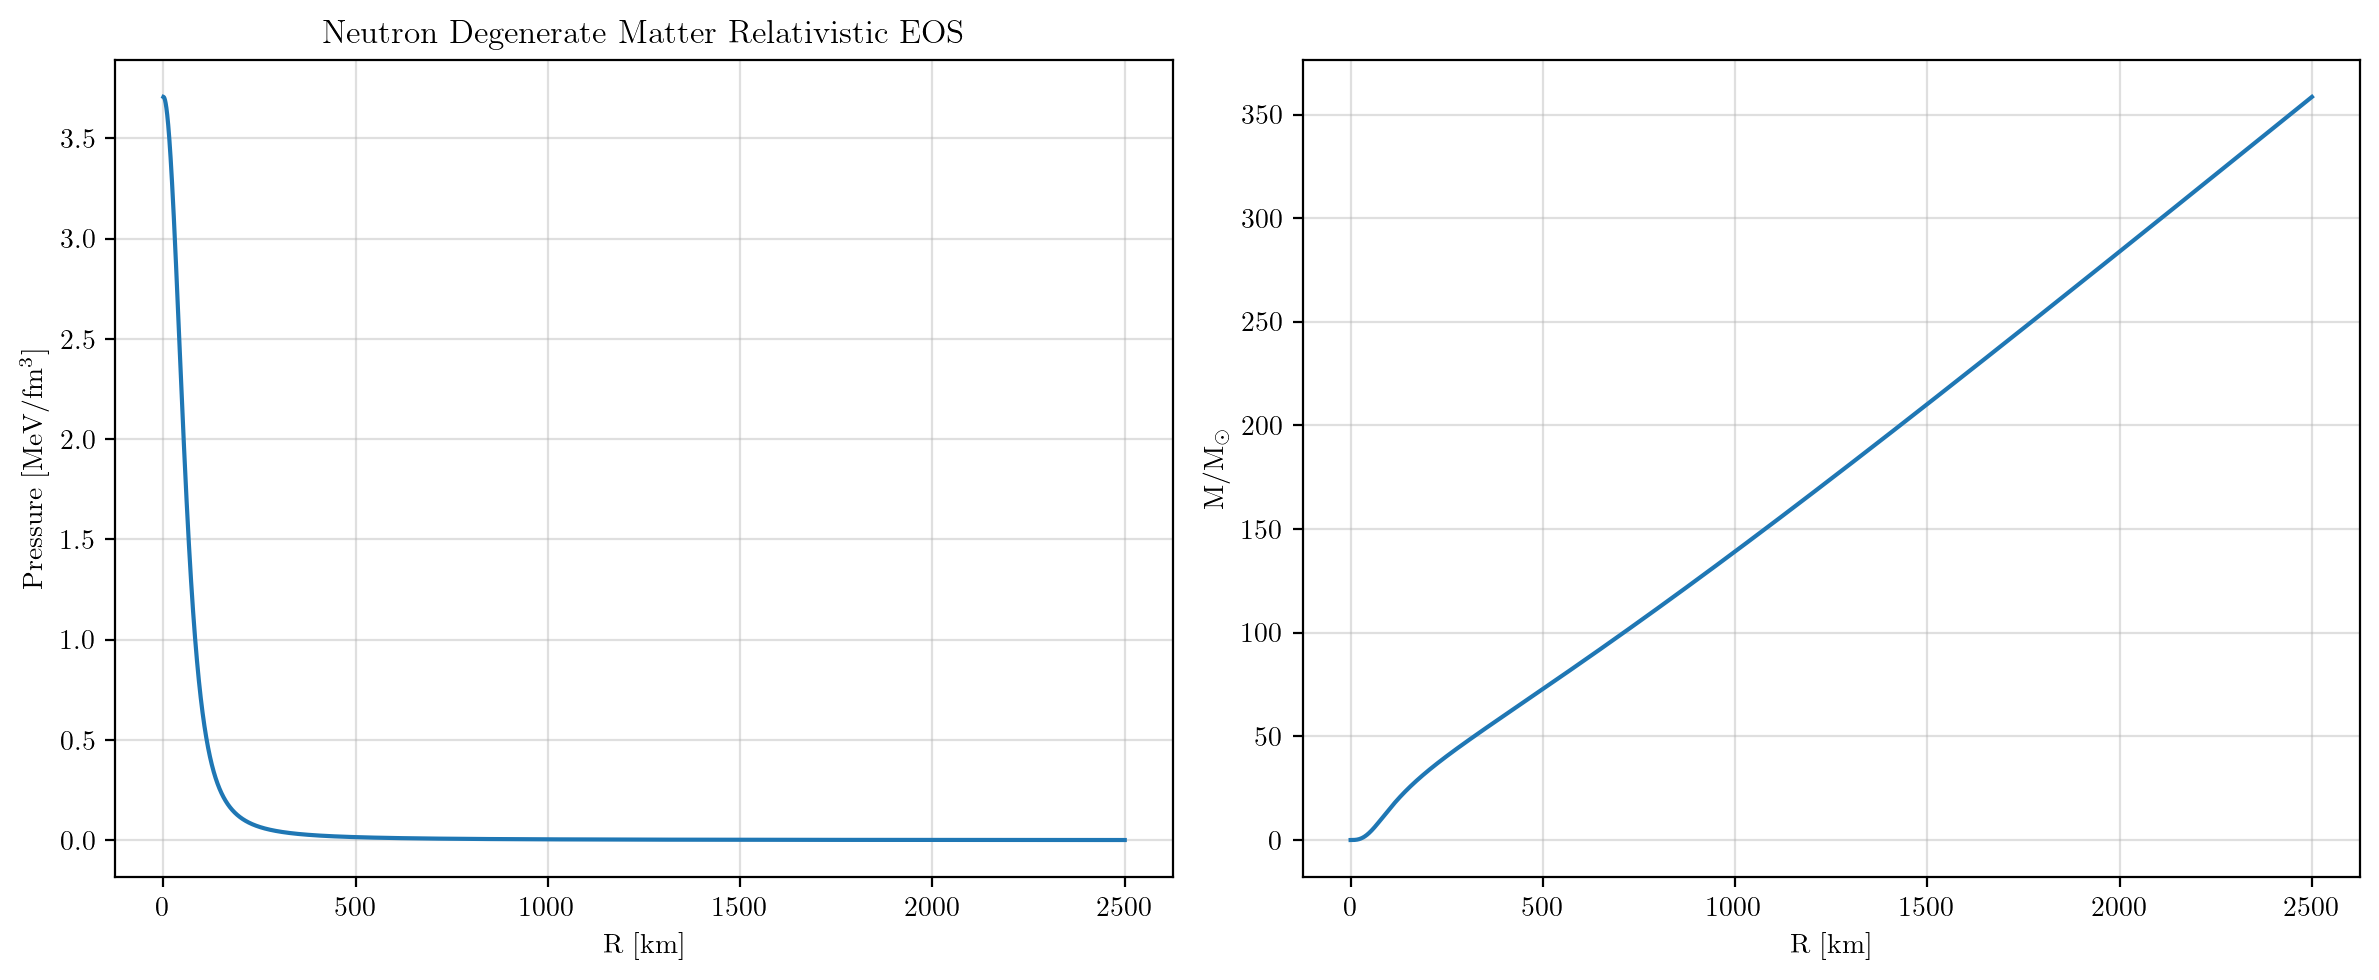

In [10]:
# ----------------------------------------------------
# TOV equations
# ----------------------------------------------------

def R_TOV_neutron_matter(x,r):
    p, M = x
    if p < 0:
        # avoid negative pressure during integration
        return [0, 0]

    term1 = R_0.value * (p/K_R)**(1/gamma_R) * M / r**2
    term2 = 1 + p**(1-1/gamma_R) * K_R**(1/gamma_R)
    if M == 0:
        term3 = 1.0
    else:
        term3 = 1.0 + alpha * r**3 * p / M
    term4 = 1 - 2 * R_0.value * M / r

    if term4 <= 0:
        return [0, 0]

    dpdr = - term1 * term2 * term3 / term4
    dMdr = alpha * r**2 * (p/K_R)**(1/gamma_R)

    return [dpdr, dMdr]



# ----------------------------------------------------
# Initial conditions
# ----------------------------------------------------

central_pressure =  p_R_EOS_neutron_matter(central_energy)

r0 = 0.1             
central_mass_density = (central_energy * e_0 / c**2 /M_sun).to(1/ u.km**3)
central_mass = (4/3) * np.pi * r0**3 * central_mass_density.value
x0 = [central_pressure, central_mass]   # p(r0), M(r0)
deltar = 0.1
radius = np.arange(r0, 2000000, deltar)  # integra llarg
    
sol = odeint(R_TOV_electron_matter, x0, radius)

pressure = sol[:,0]
mass = sol[:,1]

#R_surface = radius[np.where(pressure <= 0)[0][0]]  # first index where pressure <= 0
#P_surface = pressure[np.where(pressure <= 0)[0][0]]  #stores the state vector at the event
#M_surface = mass[np.where(pressure <= 0)[0][0]]  #stores the state vector at the event
#print("Surface radius:", R_surface)
#print("Pressure at surface:", P_surface)   # Should be exactly 0
#print("Mass at surface:", M_surface)

# ----------------------------------------------------
# Plot results
# ----------------------------------------------------
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(radius[:5000*5], pressure[:5000*5]*e_0)
#plt.plot(radius, pressure*e_0)
plt.xlabel("R [km]")
plt.ylabel("Pressure [MeV/fm$^3$]")
plt.title("Neutron Degenerate Matter Relativistic EOS")
plt.grid()

plt.subplot(1,2,2)
plt.plot(radius[:5000*5], mass[:5000*5])
#plt.plot(radius, mass)
plt.xlabel("R [km]")
plt.ylabel("M/M$_\odot$")
plt.grid()

plt.tight_layout()
plt.show()



For this EOS, the solution of $p(r)$ falls monotonically to zero at infinite. Never reaching a solution

Central pressure: 1.001e+03 MeV / fm3
Central energy density: 5.108e+01 MeV / fm3
Surface radius: 21.200000000000003
Pressure at surface: -1.7284576905123742e-09 MeV / fm3
Mass at surface: 0.29471464752285415


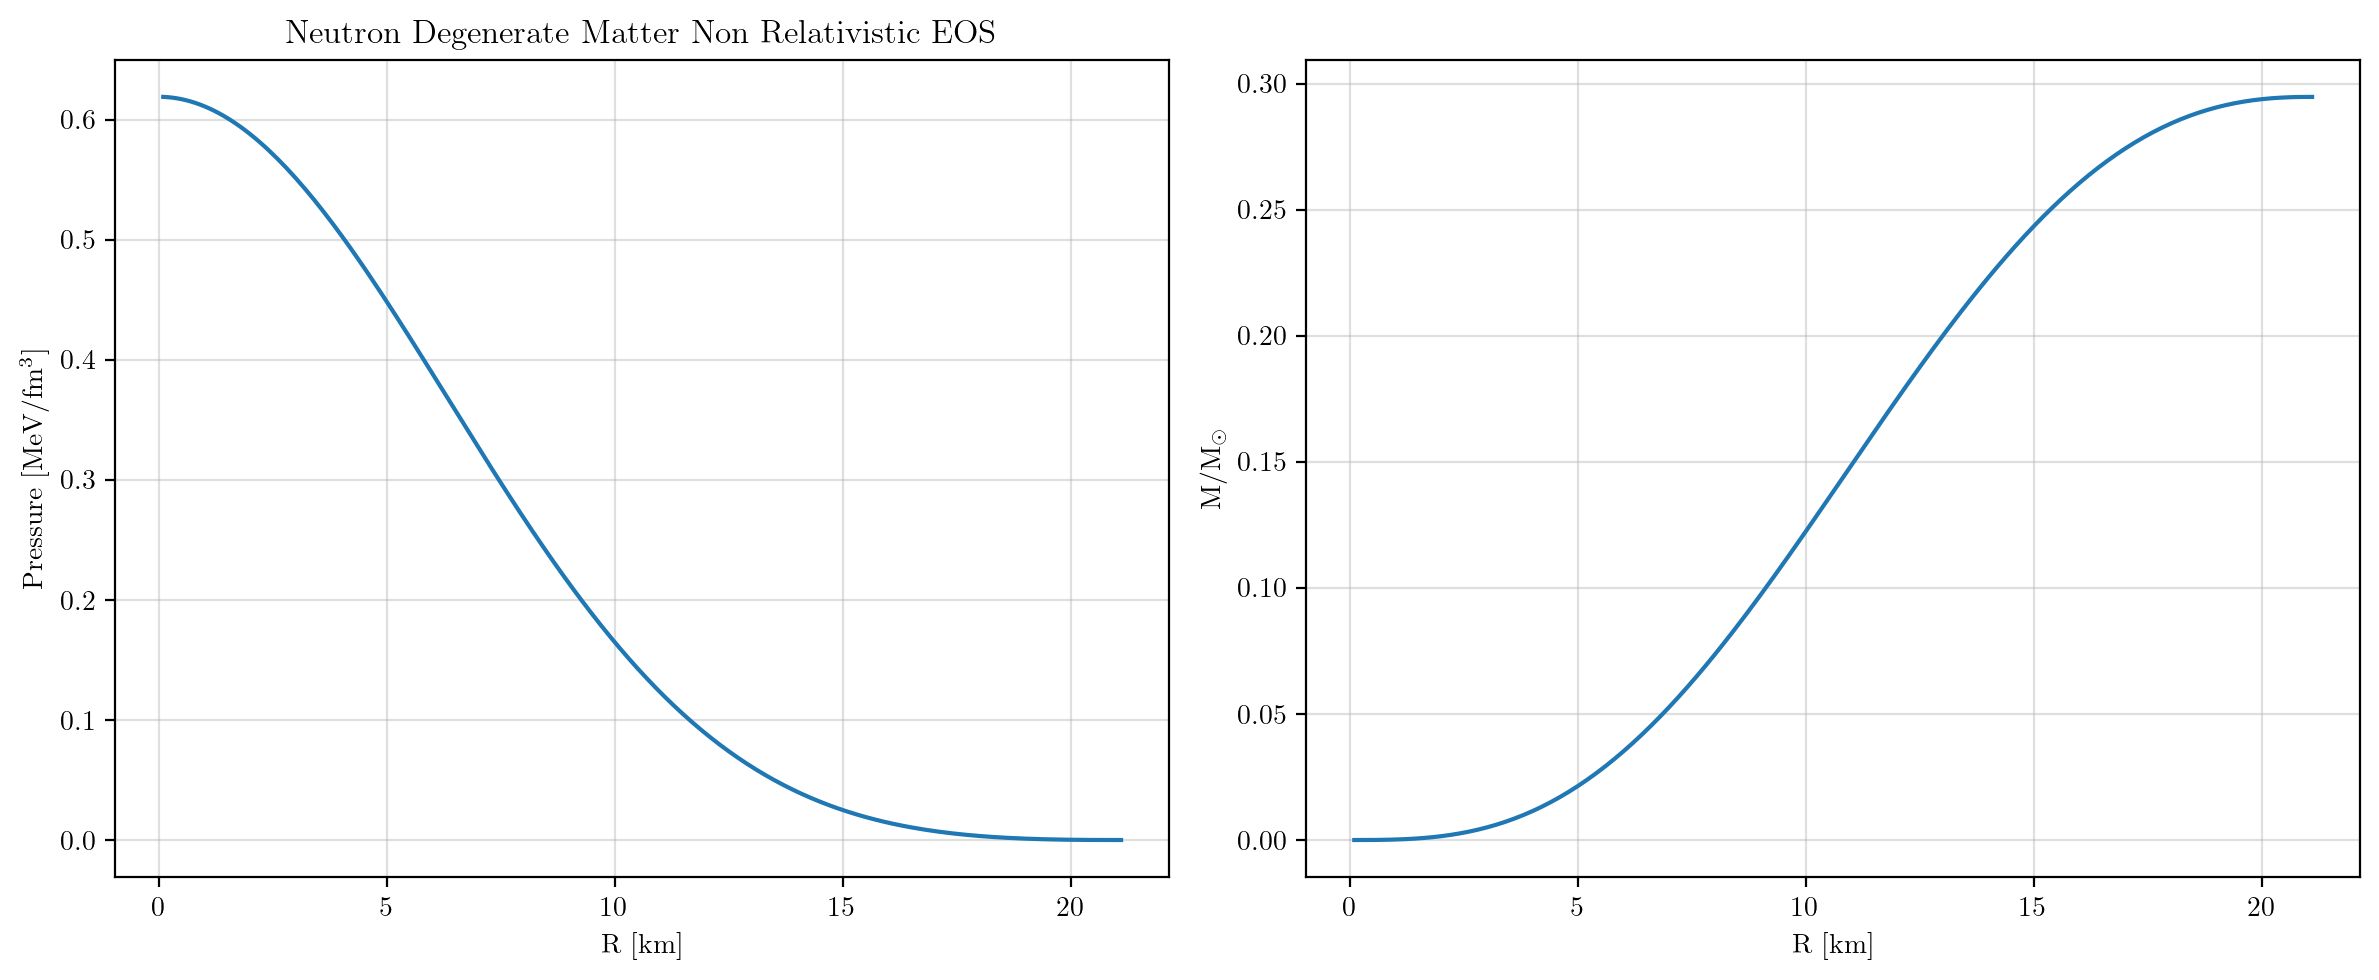

In [11]:

pc= 0.01 * 1.603* 10**38 * u.erg/u.cm**3  # central pressure
#print(f"Central pressure: {pc:.3e}")
print(f"Central pressure: {pc.to('MeV/fm3'):.3e}")
central_pressure = (pc / e_0).decompose().value  # adimensional
#print(f"Central pressure (adim): {central_pressure:.3e}")

central_energy = (central_pressure * K_NR)**(1/gamma_NR)
print(f"Central energy density: {central_energy * e_0:.3e}")
#print(f"Central energy density: {central_energy:.3e} (adim)")


# ----------------------------------------------------
# TOV equations
# ----------------------------------------------------

def NR_TOV_neutron_matter(x,r):
    p, M = x
    if p < 0:
        # avoid negative pressure during integration
        return [0, 0]

    term1 = R_0.value * (p/K_NR)**(1/gamma_NR) * M / r**2
    term2 = 1 + p**(1-1/gamma_NR) * K_NR**(1/gamma_NR)
    if M == 0:
        term3 = 1.0
    else:
        term3 = 1.0 + alpha * r**3 * p / M
    term4 = 1 - 2 * R_0.value * M / r

    if term4 <= 0:
        return [0, 0]

    dpdr = - term1 * term2 * term3 / term4
    dMdr = alpha * r**2 * (p/K_NR)**(1/gamma_NR)

    return [dpdr, dMdr]



# ----------------------------------------------------
# Initial conditions
# ----------------------------------------------------

central_pressure =  p_NR_EOS_neutron_matter(central_energy)

r0 = 0.1             
central_mass_density = (central_energy * e_0 / c**2 /M_sun).to(1/ u.km**3)
central_mass = (4/3) * np.pi * r0**3 * central_mass_density.value
x0 = [central_pressure, central_mass]   # p(r0), M(r0)
deltar = 0.1
radius = np.arange(r0, 2000000, deltar)  # integra llarg
    
sol = odeint(NR_TOV_electron_matter, x0, radius)

pressure = sol[:,0]
mass = sol[:,1]

R_surface = radius[np.where(pressure <= 0)[0][0]]  # first index where pressure <= 0
P_surface = pressure[np.where(pressure <= 0)[0][0]]  #stores the state vector at the event
M_surface = mass[np.where(pressure <= 0)[0][0]]  #stores the state vector at the event
print("Surface radius:", R_surface)
print("Pressure at surface:", P_surface * e_0)   # Should be exactly 0
print("Mass at surface:", M_surface)

# ----------------------------------------------------
# Plot results
# ----------------------------------------------------
plt.figure(figsize=(12,5))
#plot until reaches zero pressure
plt.subplot(1,2,1)
plt.plot(radius[:np.where(pressure <= 0)[0][0]], pressure[:np.where(pressure <= 0)[0][0]]*e_0)
plt.xlabel("R [km]")
plt.ylabel("Pressure [MeV/fm$^3$]")
plt.title("Neutron Degenerate Matter Non Relativistic EOS")
plt.grid()

plt.subplot(1,2,2)
plt.plot(radius[:np.where(pressure <= 0)[0][0]], mass[:np.where(pressure <= 0)[0][0]])
plt.xlabel("R [km]")
plt.ylabel("M/M$_\odot$")
plt.grid()

plt.tight_layout()
plt.show()

For this EOS, the results matches the expected results

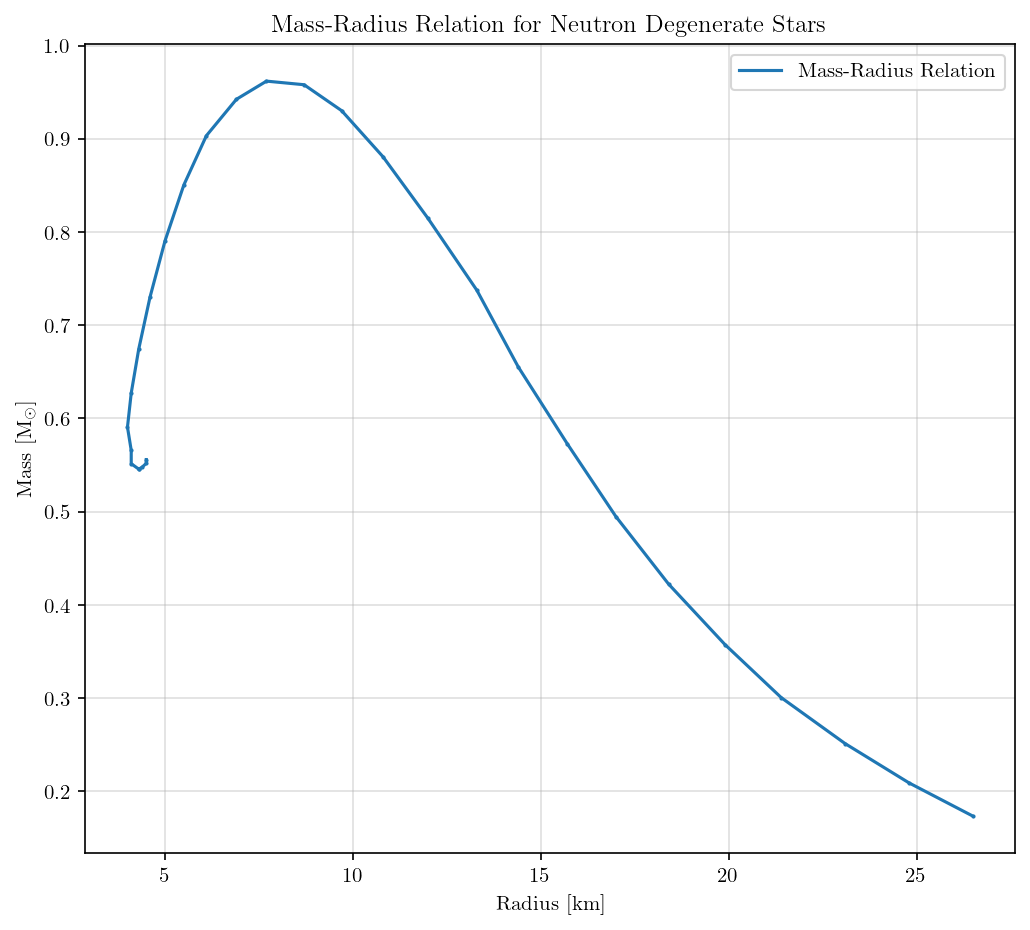

In [12]:
central_energies = np.logspace(-1, 4, 30)
def solve_TOV(central_energy):

    # Compute initial pressure from EOS
    central_pressure = p_NR_EOS_neutron_matter(central_energy)

    r0 = 0.1
    central_mass_density = (central_energy * e_0 / c**2 / M_sun).to(1/u.km**3)
    central_mass = (4/3)*np.pi*r0**3 * central_mass_density.value
    x0 = [central_pressure, central_mass]

    # Radius grid for integration
    radius = np.arange(r0, 2e6, deltar)

    # Integrate
    sol = odeint(NR_TOV_neutron_matter, x0, radius)
    pressure = sol[:,0]
    mass     = sol[:,1]

    # ------------------------------------------------------
    # Find first radius where pressure <= 0
    # ------------------------------------------------------
    idx = np.where(pressure <= 0)[0]

    if len(idx) == 0:
        # No surface found → warn and return fallback
        print(" WARNING: No zero-pressure surface for central_energy =", central_energy)
        print("  Final pressure:", pressure[-1])

        # Fallback = last integration point
        R_surface = radius[-1]
        M_surface = mass[-1]

        return R_surface, M_surface

    # ------------------------------------------------------
    # Surface found normally
    # ------------------------------------------------------
    i = idx[0]
    R_surface = radius[i]
    P_surface = pressure[i]
    M_surface = mass[i]

    # Optional warning if pressure is not exactly zero
    if abs(P_surface) > 1e-5:
        print("Pressure not exactly zero at surface:", P_surface*e_0)

    return R_surface, M_surface


radii = []
masses = []
for ce in central_energies:
    R_star, M_star = solve_TOV(ce)
    radii.append(R_star)
    masses.append(M_star)
plt.figure(figsize=(8,7), dpi=150)
plt.plot(radii, masses, label='Mass-Radius Relation')
plt.scatter(radii, masses, s=1)
plt.xlabel('Radius [km]')
plt.ylabel('Mass [M$_\odot$]')
plt.title('Mass-Radius Relation for Neutron Degenerate Stars')
plt.grid()
plt.legend()
plt.show()

Using their values to see if it matches exactly


In [13]:
#----------------------------
#Define the parameters
#----------------------------
A_NR = 2.4216 
A_R = 2.8663 

alpha = R_0

e_0 = (5.346e36 * u.erg / u.cm**3).to('erg/km3')

R0 = (G * M_sun / c**2).to(u.km)  

beta = (4 * np.pi * e_0 / (M_sun * c**2)).to('1/km3')

print('Energy density unit:', e_0)  
print('R0:', R0)
print('A_NR:', A_NR)
print('A_R:', A_R)
print('beta:', beta)

Energy density unit: 5.3459999999999995e+51 erg / km3
R0: 1.476625038050125 km
A_NR: 2.4216
A_R: 2.8663
beta: 0.037591659843818674 1 / km3


Pc=0.01 e0 -> R=13.460 km, M=0.7178 M_sun
Pc=0.01 e0 -> R=15.039 km, M=1.0390 M_sun


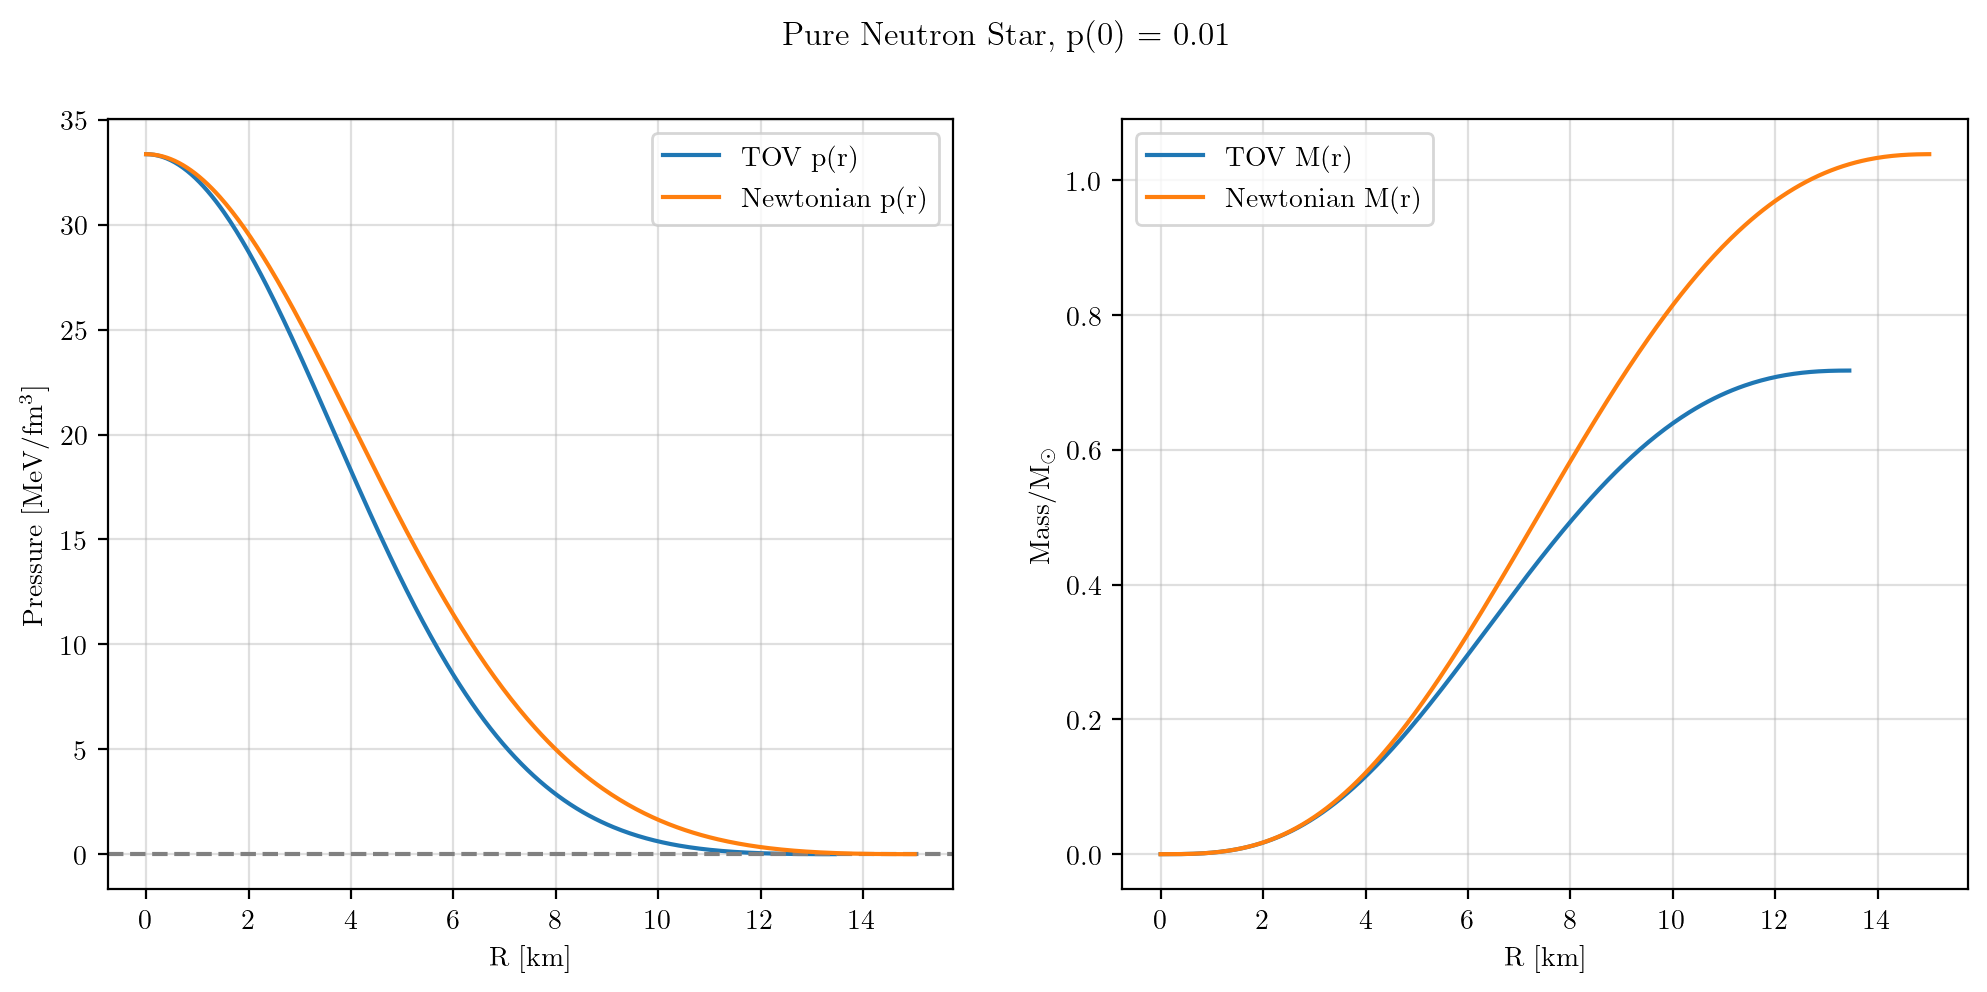

In [14]:
#-----------------------
#Define the ODE system
#-----------------------


def TOV_gen(r, x):
    p, M = x
    if p <= 0:
        return [0.0, 0.0]

    eps = A_NR * p**(3/5) + A_R * p

    term1 = alpha.value * eps * M / r **2 
    term2 = 1 +  p / eps
    term3 = 1 + beta.value * p * r**3 / M
    denom = 1 - 2 * R0.value * M / r

    if denom <= 0:
        return [0.0, 0.0]
    dpdr = -term1 * term2 * term3 / denom
    dMdr = beta.value * r**2 * eps 
    return [dpdr, dMdr]

def stop_at_zero_pressure(r, y):
    return y[0]
stop_at_zero_pressure.terminal = True
stop_at_zero_pressure.direction = -1


#-----------------------
#Solve
#-----------------------
Pc = 0.01
r0 = 1e-3
m0 = (4.0/3.0 * np.pi * r0**3 * (u.km)**3 * (3.0* Pc * u.erg / (u.cm) **3 /c**2)) / M_sun
rmax = 200

x_init = [Pc, m0.value]
r_span = (r0, rmax)  #Integration range
r_eval = np.linspace(r0, rmax, 5000) #Points where solution is evaluated



sol = solve_ivp(TOV_gen,  r_span, x_init, t_eval=r_eval, events=stop_at_zero_pressure, max_step=100.0, rtol=1e-6, atol=1e-8)

if sol.t_events[0].size > 0:
        Rsurf = sol.t_events[0][0]
else:
        Rsurf = sol.t[-1]
Mfinal = sol.y[1, -1]


print(f"Pc={Pc} e0 -> R={Rsurf:.3f} km, M={Mfinal:.4f} M_sun")

#-----------------------
#Plot results
#-----------------------

r = sol.t; p = sol.y[0]; M = sol.y[1]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(r, (p*e_0).to('MeV/fm3'), label="TOV p(r)")
ax1.axhline(0, color="gray", linestyle="--")
ax1.set_xlabel('R [km]')
ax1.set_ylabel('Pressure [MeV/fm$^3$]')

ax1.grid()


ax2.plot(r, M, label="TOV M(r)")
ax2.set_xlabel('R [km]')
ax2.set_ylabel('Mass/M$_\odot$')
ax2.grid()


fig.suptitle(f'Pure Neutron Star, p(0) = {Pc}')

#-----------------------
#Plot results for Newtonian solutions
#-----------------------

def newton_gen(r, x):
    p, M = x
    if p <= 0:
        return [0.0, 0.0]

    eps = A_NR * p**(3/5) + A_R * p

    dpdr = - alpha.value * eps * M / r **2 

    dMdr = beta.value * r**2 * eps 
    return [dpdr, dMdr]


sol = solve_ivp(newton_gen,  r_span, x_init, t_eval=r_eval, events=stop_at_zero_pressure, max_step=100.0, rtol=1e-6, atol=1e-8)

if sol.t_events[0].size > 0:
        Rsurf = sol.t_events[0][0]
else:
        Rsurf = sol.t[-1]
Mfinal = sol.y[1, -1]

r = sol.t; p = sol.y[0]; M = sol.y[1]
print(f"Pc={Pc} e0 -> R={Rsurf:.3f} km, M={Mfinal:.4f} M_sun")

ax1.plot(r, p*(e_0).to('MeV/fm3'), label="Newtonian p(r)")
ax2.plot(r, M, label="Newtonian M(r)")
ax1.legend()
ax2.legend()
plt.show()


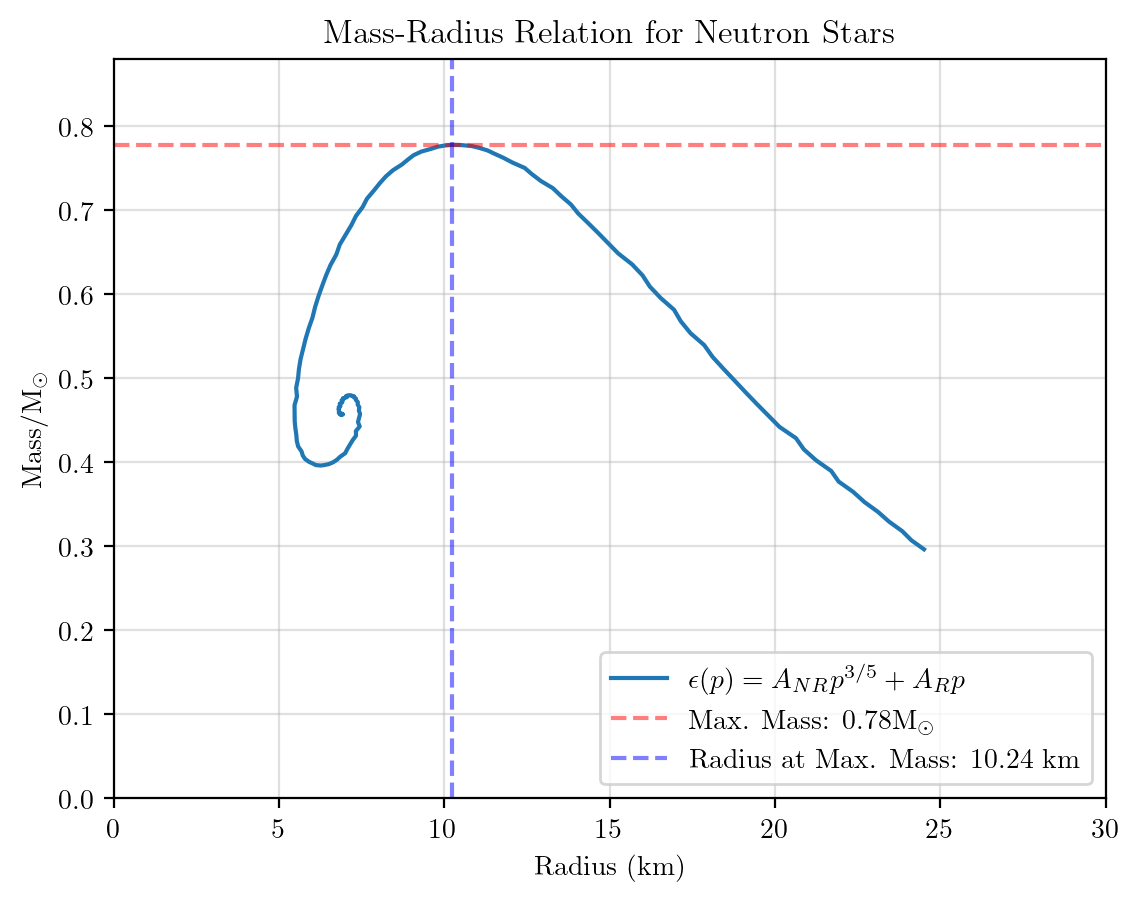

In [15]:
#-----------------------
# Try for different central pressures
#-----------------------


p_c_values = np.logspace(-4, 5, 150)
data =[]

for pc in p_c_values:

    r0 = 0.001 
    m0 = (4.0/3.0 * np.pi * r0**3 * (u.km)**3 * (3.0* pc * u.erg / (u.cm) **3 /c**2)) / M_sun
    rmax = 200

    x_init = [pc, m0]
    r_span = (r0, rmax)  
    r_eval = np.linspace(r0, rmax, rmax * 100) 

    sol = solve_ivp(TOV_gen,  r_span, x_init, t_eval=r_eval, events=stop_at_zero_pressure, max_step=100.0, rtol=1e-6, atol=1e-8)

    if sol.t_events[0].size > 0:
            Rsurf = sol.t_events[0][0]
    else:
            Rsurf = sol.t[-1]
    Mfinal = sol.y[1, -1]

    result = [pc, Rsurf, Mfinal]
    data.append(result)

gen_data = pd.DataFrame(data, columns=['P_c', 'R_km', 'M_solar'])

max_mass = gen_data['M_solar'].max()
max_radius = gen_data.loc[gen_data['M_solar'].idxmax(), 'R_km']


plt.plot(gen_data['R_km'], gen_data['M_solar'], label='$\epsilon(p) = A_{NR} p^{3/5} + A_R p$')


plt.axhline(y=max_mass, color='red', linestyle='--', label=f'Max. Mass: {max_mass:.2f}M$_\odot$',alpha=0.5)    
plt.axvline(x=max_radius, color='blue', linestyle='--', label=f'Radius at Max. Mass: {max_radius:.2f} km', alpha=0.5)

plt.xlabel('Radius (km)')
plt.ylabel('Mass/M$_\odot$')
plt.title('Mass-Radius Relation for Neutron Stars')
plt.legend()
plt.grid()
plt.xlim(0, 30)
plt.ylim(0, 0.8 * 1.1)


plt.show()